In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
dataset=pd.read_csv("Social_Network_Ads.csv")
x=dataset.iloc[:, [2,3]].values
y=dataset.iloc[:,4].values

In [8]:
from sklearn.cross_validation import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=0)

In [9]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtest=sc.fit_transform(xtest)

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [15]:
from sklearn.svm import SVC
classifier=SVC(kernel='rbf',random_state=0)
classifier.fit(xtrain,ytrain)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [16]:
ypred=classifier.predict(xtest)

In [17]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(ytest,ypred)

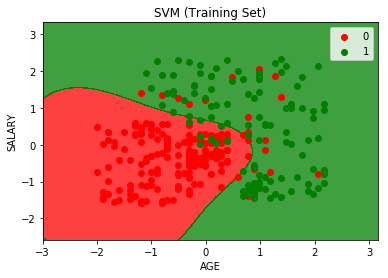

In [19]:
from matplotlib.colors import ListedColormap
xset,yset=xtrain,ytrain
x1,x2=np.meshgrid(np.arange(start=xset[:,0].min()-1, stop=xset[:,0].max()+1, step=0.01),
                 np.arange(start=xset[:,1].min()-1, stop=xset[:,1].max()+1, step=0.01))
plt.contourf(x1,x2,classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
            alpha=0.75,cmap=ListedColormap(('red','green')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(yset)):
    plt.scatter(xset[yset==j,0],xset[yset==j,1],
               c=ListedColormap(('red','green'))(i),label=j)
plt.title('SVM (Training Set)')
plt.xlabel('AGE')
plt.ylabel('SALARY')
plt.legend()
plt.show()
    

In [18]:
cm

array([[64,  4],
       [ 3, 29]], dtype=int64)